# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
# Importing file from another folder
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# import pandas_to_latex_test

from TE.latex_scripts.pandas_to_latex import df_to_latex

/Users/stianismar/Dropbox/gitProsjekter/project-thesis
Importing Jupyter notebook from /Users/stianismar/Dropbox/gitProsjekter/project-thesis/TE/latex_scripts/pandas_to_latex.ipynb


In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

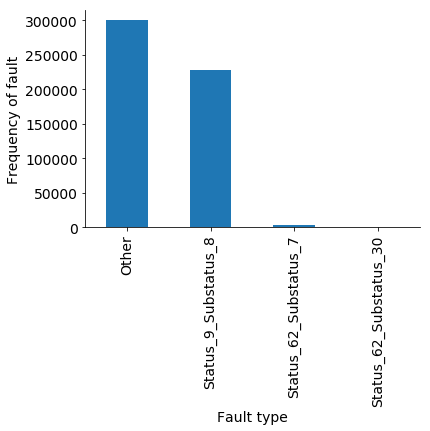

<Figure size 1440x1152 with 0 Axes>

In [4]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [5]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [6]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

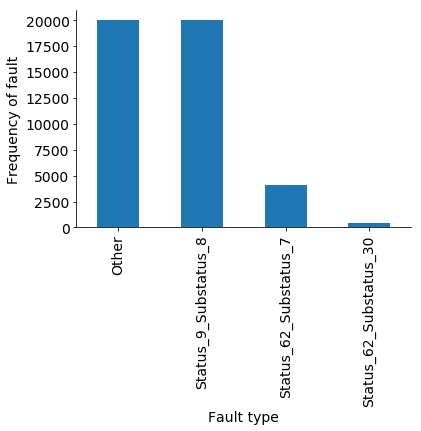

<Figure size 1440x1152 with 0 Axes>

In [7]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [8]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,21-11-2018 19:23:30,-12.0,1.6,0.43,247.0,0.0,17.0,22.0,22.0,24.0,...,19.0,27.0,20.0,7.0,9.0,15.0,30.0,60.049999,235.0,Other
1,08-11-2018 19:04:30,16.0,5.9,14.41,122.0,436.0,26.0,30.0,34.0,20.0,...,48.0,27.0,45.0,8.0,18.0,23.0,45.0,1.000000,138.0,Other
2,09-08-2018 10:57:00,1.5,6.9,13.82,236.0,350.0,30.0,45.0,39.0,30.0,...,46.0,42.0,45.0,22.0,30.0,34.0,51.0,1.000000,237.5,Other
3,15-05-2019 20:46:30,8.0,1.9,5.81,17.0,0.0,19.0,25.0,25.0,22.0,...,26.0,26.0,28.0,10.0,16.0,22.0,36.0,1.000000,25.0,Other
4,01-10-2018 15:07:30,2.0,6.5,11.84,282.0,0.0,13.0,24.0,24.0,17.0,...,72.0,32.0,46.0,8.0,14.0,17.0,32.0,15.000000,284.0,Status_9_Substatus_8


In [9]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [10]:
y.value_counts()

Other                     20000
Status_9_Substatus_8      20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [11]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [12]:
columns_for_data = X_train.columns

In [13]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [14]:
y_test.value_counts()

Other                     6600
Status_9_Substatus_8      6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## SMOTE (BEFORE RANDOM FOREST)

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smote1 ,y_train_smote1 = sm.fit_resample(X_train, y_train)


X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

## Random forest and feature importance

Normalized confusion matrix
[[9.80606061e-01 1.81818182e-03 6.81818182e-03 1.07575758e-02]
 [1.64090909e-01 8.30909091e-01 0.00000000e+00 5.00000000e-03]
 [3.03030303e-03 0.00000000e+00 9.96969697e-01 0.00000000e+00]
 [1.83333333e-02 1.51515152e-04 0.00000000e+00 9.81515152e-01]]


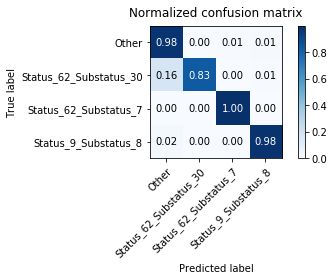

Total Accuracy 		0.948

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.841 		 0.981 		 0.905
Status_62_Substatus_30    	 0.998 		 0.831 		 0.907
Status_62_Substatus_7     	 0.993 		 0.997 		 0.995
Status_9_Substatus_8      	 0.984 		 0.982 		 0.983
Normalized confusion matrix
[[9.82424242e-01 3.03030303e-04 5.45454545e-03 1.18181818e-02]
 [1.73228346e-01 8.26771654e-01 0.00000000e+00 0.00000000e+00]
 [2.21893491e-03 0.00000000e+00 9.97781065e-01 0.00000000e+00]
 [1.30303030e-02 3.03030303e-04 1.51515152e-04 9.86515152e-01]]


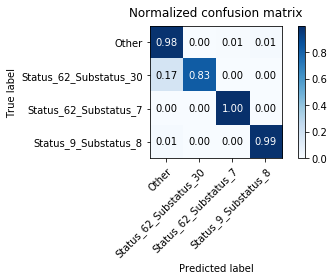

Total Accuracy 		0.984

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.983 		 0.982 		 0.983
Status_62_Substatus_30    	 0.963 		 0.827 		 0.890
Status_62_Substatus_7     	 0.973 		 0.998 		 0.985
Status_9_Substatus_8      	 0.988 		 0.987 		 0.987


In [16]:
rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [17]:
df_to_latex(rf1.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.156093 \\
   0.089329 \\
   0.083079 \\
   0.053553 \\
   0.045606 \\
\bottomrule
\end{tabular}



## Scale dataset for SVM

In [18]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.519417,0.188525,0.600258,0.877437,0.160833,0.473684,0.593023,0.331169,0.541176,0.559524,...,0.741573,0.720930,0.583333,0.489362,0.372549,0.5000,0.326531,0.319588,0.053897,0.917151
1,0.506568,0.177596,0.507943,0.387187,0.000000,0.421053,0.476744,0.272727,0.423529,0.452381,...,0.820225,0.825581,0.466667,0.446809,0.176471,0.3375,0.244898,0.206186,0.124178,0.542359
2,0.515420,0.191257,0.605839,0.303621,0.163333,0.578947,0.639535,0.331169,0.600000,0.595238,...,0.719101,0.720930,0.633333,0.436170,0.509804,0.6000,0.469388,0.402062,0.000000,0.486503
3,0.545403,0.292350,0.000000,0.345404,0.000000,0.578947,0.593023,0.331169,0.564706,0.583333,...,0.179775,0.197674,0.400000,0.085106,0.313725,0.4375,0.142857,0.474227,0.970788,0.539452
4,0.533124,0.161202,0.644053,0.261838,0.225000,0.460526,0.616279,0.311688,0.470588,0.476190,...,0.651685,0.593023,0.500000,0.340426,0.156863,0.3125,0.020408,0.237113,0.020912,0.468231


In [19]:
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

df_to_latex(head_row_col(X_train_scaled_df))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.188525 &    0.600258 &          0.877437 &     0.160833 &             0.473684 &  ... \\
  0.177596 &    0.507943 &          0.387187 &     0.000000 &             0.421053 &  ... \\
  0.191257 &    0.605839 &          0.303621 &     0.163333 &             0.578947 &  ... \\
  0.292350 &    0.000000 &          0.345404 &     0.000000 &             0.578947 &  ... \\
  0.161202 &    0.644053 &          0.261838 &     0.225000 &             0.460526 &  ... \\
\bottomrule
\end{tabular}



## SMOTE (For SVM)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.38348485 0.34651515 0.13060606 0.13939394]
 [0.21259843 0.62204724 0.09448819 0.07086614]
 [0.03180473 0.05251479 0.86538462 0.05029586]
 [0.11636364 0.25227273 0.01287879 0.61848485]]


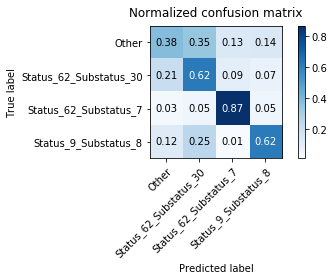

Plotting Performance Measure...
Total Accuracy 		0.536

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.751 		 0.383 		 0.508
Status_62_Substatus_30    	 0.019 		 0.622 		 0.037
Status_62_Substatus_7     	 0.550 		 0.865 		 0.672
Status_9_Substatus_8      	 0.804 		 0.618 		 0.699


In [21]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[8.56060606e-01 0.00000000e+00 1.03030303e-02 1.33636364e-01]
 [8.97637795e-01 0.00000000e+00 0.00000000e+00 1.02362205e-01]
 [5.08875740e-01 0.00000000e+00 4.40088757e-01 5.10355030e-02]
 [3.54545455e-01 0.00000000e+00 1.51515152e-04 6.45303030e-01]]


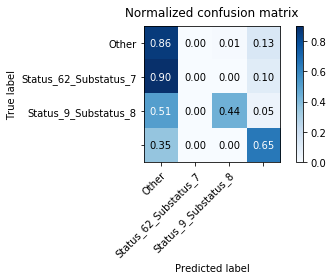

Plotting Performance Measure...
Total Accuracy 		0.716

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.643 		 0.856 		 0.734
Status_62_Substatus_7     	 0.896 		 0.440 		 0.590
Status_9_Substatus_8      	 0.815 		 0.645 		 0.720


In [22]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.45348485 0.33090909 0.11545455 0.10015152]
 [0.23727273 0.63651515 0.0880303  0.03818182]
 [0.03015152 0.00424242 0.91742424 0.04818182]
 [0.12106061 0.25333333 0.0119697  0.61363636]]


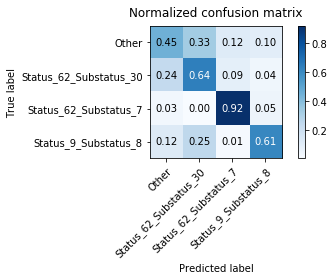

Plotting Performance Measure...
Total Accuracy 		0.655

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.539 		 0.453 		 0.492
Status_62_Substatus_30    	 0.520 		 0.637 		 0.572
Status_62_Substatus_7     	 0.810 		 0.917 		 0.860
Status_9_Substatus_8      	 0.767 		 0.614 		 0.682


In [23]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [24]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

(53600, 34)
(29802,)
(26400, 34)
(14679,)


Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.45348485 0.33090909 0.11545455 0.10015152]
 [0.23727273 0.63651515 0.0880303  0.03818182]
 [0.03015152 0.00424242 0.91742424 0.04818182]
 [0.12106061 0.25333333 0.0119697  0.61363636]]


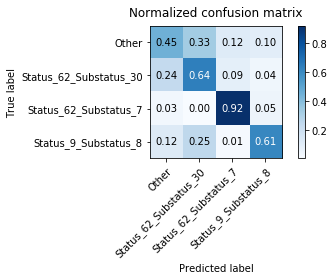

Plotting Performance Measure...
Total Accuracy 		0.655

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.539 		 0.453 		 0.492
Status_62_Substatus_30    	 0.520 		 0.637 		 0.572
Status_62_Substatus_7     	 0.810 		 0.917 		 0.860
Status_9_Substatus_8      	 0.767 		 0.614 		 0.682


In [25]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [26]:
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

# Print to latex
df_to_latex(df_selected_features)


\begin{tabular}{l}
\toprule
Selected features for decision tree \\
\midrule
   Log-T-Raw-TransformerTemperature \\
       Log-T-Raw-Stator1Temperature \\
       Log-T-Raw-Rectifier1HeatSink \\
       Log-T-Raw-Rectifier2HeatSink \\
        Log-T-Raw-Rotor1Temperature \\
                        ActivePower \\
\bottomrule
\end{tabular}



In [27]:
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

['', 'TransformerTemperature']
['', 'Stator1Temperature']
['', 'Rectifier1HeatSink']
['', 'Rectifier2HeatSink']
['', 'Rotor1Temperature']
['ActivePower']


['TransformerTemperature',
 'Stator1Temperature',
 'Rectifier1HeatSink',
 'Rectifier2HeatSink',
 'Rotor1Temperature',
 'ActivePower']

In [28]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled_smote))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled_smote))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

,Log-T-Raw-TransformerTemperature,Log-T-Raw-Stator1Temperature,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-Rotor1Temperature,ActivePower
0,0.278351,0.581921,0.820225,0.872093,0.259434,0.000000
1,0.659794,0.774011,0.696629,0.604651,0.443396,0.986667
2,0.340206,0.406780,0.404494,0.418605,0.169811,0.007917
3,0.371134,0.418079,0.640449,0.720930,0.179245,0.026667
4,0.701031,0.745763,0.719101,0.720930,0.353774,0.982500


In [29]:
col_rename_dict = {i:j for i,j in zip(X_test_scaled_removed.columns,shorter_feature_names)}
X_test_scaled_removed.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_test_scaled_removed.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,TransformerTemperature,Stator1Temperature,Rectifier1HeatSink,Rectifier2HeatSink,Rotor1Temperature,ActivePower
0,0.278351,0.581921,0.820225,0.872093,0.259434,0.000000
1,0.659794,0.774011,0.696629,0.604651,0.443396,0.986667
2,0.340206,0.406780,0.404494,0.418605,0.169811,0.007917
3,0.371134,0.418079,0.640449,0.720930,0.179245,0.026667
4,0.701031,0.745763,0.719101,0.720930,0.353774,0.982500


Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.4869697  0.41621212 0.07712121 0.01969697]
 [0.22166667 0.74848485 0.02530303 0.00454545]
 [0.13636364 0.00560606 0.80969697 0.04833333]
 [0.08757576 0.39166667 0.0119697  0.50878788]]


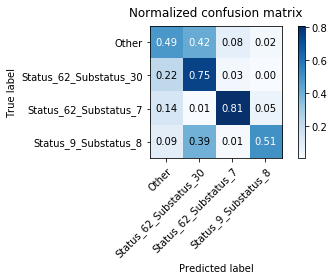

Plotting Performance Measure...
Total Accuracy 		0.638

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.522 		 0.487 		 0.504
Status_62_Substatus_30    	 0.479 		 0.748 		 0.584
Status_62_Substatus_7     	 0.876 		 0.810 		 0.842
Status_9_Substatus_8      	 0.875 		 0.509 		 0.643
Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.04712121 0.85606061 0.07712121 0.01969697]
 [0.06924242 0.90090909 0.02530303 0.00454545]
 [0.00924242 0.13272727 0.80969697 0.04833333]
 [0.01015152 0.46909091 0.0119697  0.50878788]]


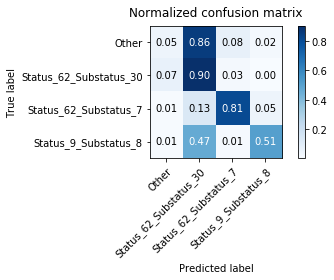

Plotting Performance Measure...
Total Accuracy 		0.567

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.347 		 0.047 		 0.083
Status_62_Substatus_30    	 0.382 		 0.901 		 0.536
Status_62_Substatus_7     	 0.876 		 0.810 		 0.842
Status_9_Substatus_8      	 0.875 		 0.509 		 0.643


In [30]:
# Train DT on these features and print it out:
dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [31]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_test_scaled_removed.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [32]:
save_tree(dt_depth2,"depth2")
save_tree(dt_depth3,"depth3")